# Ookla 2024 Q2 Performance Mobile

GitHub: https://github.com/teamookla/ookla-open-data/tree/master

Dataset: https://ookla-open-data.s3.amazonaws.com/shapefiles/performance/type=mobile/year=2024/quarter=2/2024-04-01_performance_mobile_tiles.zip

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Read the shapefile (only specify the .shp file, the others will be read automatically)
gdf = gpd.read_file("gps_mobile_tiles.shp")

In [ ]:
gdf.shape

(3703161, 7)

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3703161 entries, 0 to 3703160
Data columns (total 7 columns):
 #   Column      Dtype   
---  ------      -----   
 0   quadkey     object  
 1   avg_d_kbps  int64   
 2   avg_u_kbps  int64   
 3   avg_lat_ms  int64   
 4   tests       int64   
 5   devices     int64   
 6   geometry    geometry
dtypes: geometry(1), int64(5), object(1)
memory usage: 197.8+ MB


In [ ]:
gdf.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
count,3.703161e+06,3.703161e+06,3.703161e+06,3.703161e+06,3.703161e+06
mean,1.082961e+05,1.705709e+04,3.989862e+01,5.895604e+00,2.723163e+00
std,1.551135e+05,1.916996e+04,5.101058e+01,4.411072e+01,7.148424e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.761500e+04,3.963000e+03,2.200000e+01,1.000000e+00,1.000000e+00
50%,4.811800e+04,1.127300e+04,3.000000e+01,2.000000e+00,1.000000e+00
75%,1.316330e+05,2.340700e+04,4.200000e+01,4.000000e+00,2.000000e+00
max,4.569068e+06,1.666233e+06,2.977000e+03,3.026400e+04,4.475000e+03


In [ ]:
gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,0022133222330013,10551,19524,161,1,1,"POLYGON ((-160.03235 70.63995, -160.02686 70.6..."
1,0022133222330102,52886,20394,104,1,1,"POLYGON ((-160.02686 70.63995, -160.02136 70.6..."
2,0022133222330210,31909,20621,202,1,1,"POLYGON ((-160.03784 70.63448, -160.03235 70.6..."
3,0022320121121323,10763,4299,209,1,1,"POLYGON ((-166.74500 68.35262, -166.73950 68.3..."
4,0022332203013331,128222,10598,41,3,2,"POLYGON ((-162.60315 66.89991, -162.59766 66.8..."


In [ ]:
# Stratified sample based on geometry (e.g. 1k samples from each state)

<Axes: >

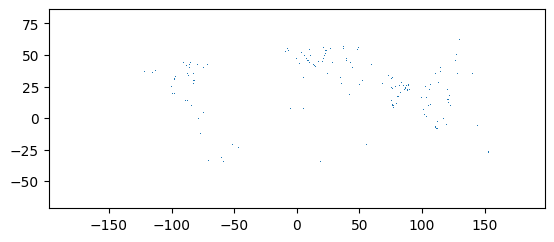

In [ ]:
gdf.plot()

In [ ]:
cols_with_int_values = gdf.select_dtypes(include=['int64'])
cols_with_int_values

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,10551,19524,161,1,1
1,52886,20394,104,1,1
2,31909,20621,202,1,1
3,10763,4299,209,1,1
4,128222,10598,41,3,2
...,...,...,...,...,...
3703156,23923,310,64,1,1
3703157,48211,20319,37,1,1
3703158,50091,659,58,1,1
3703159,48186,14611,54,1,1


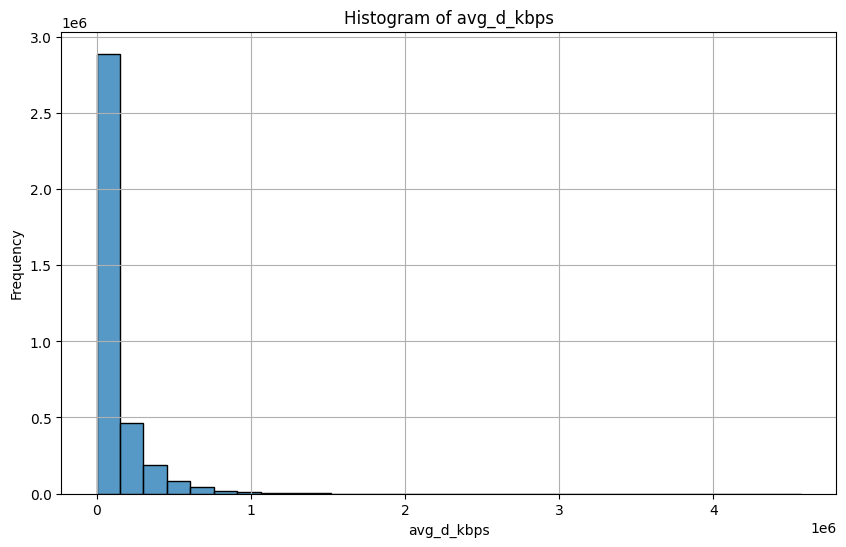

In [ ]:
plt.figure(figsize=(10, 6))
# sns.histplot(gdf['avg_d_kbps'], bins=30, kde=True)  # kde=True adds a density line
sns.histplot(gdf['avg_d_kbps'], bins=30)
plt.title('Histogram of avg_d_kbps')
plt.xlabel('avg_d_kbps')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

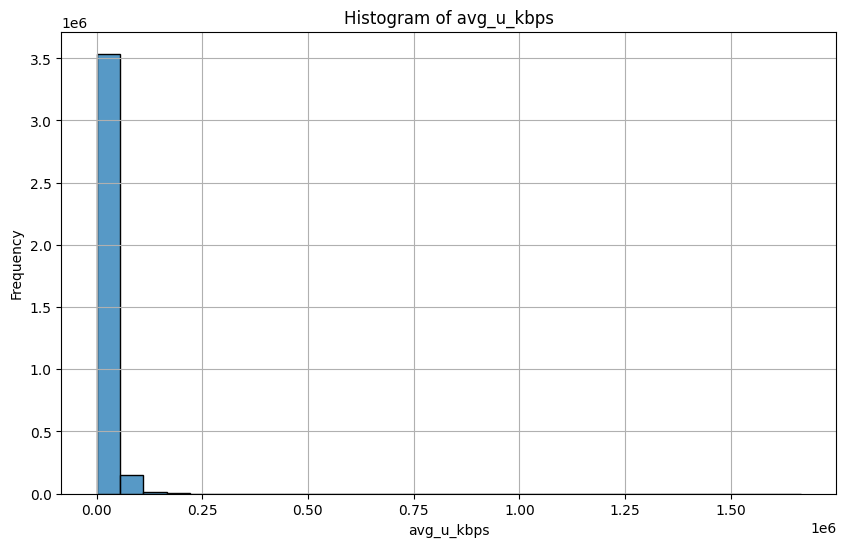

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(gdf['avg_u_kbps'], bins=30)
plt.title('Histogram of avg_u_kbps')
plt.xlabel('avg_u_kbps')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

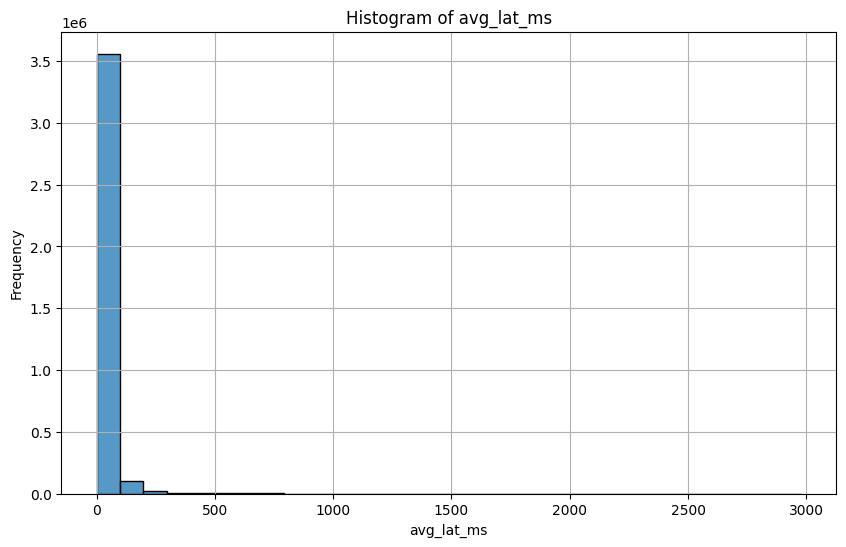

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(gdf['avg_lat_ms'], bins=30)
plt.title('Histogram of avg_lat_ms')
plt.xlabel('avg_lat_ms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

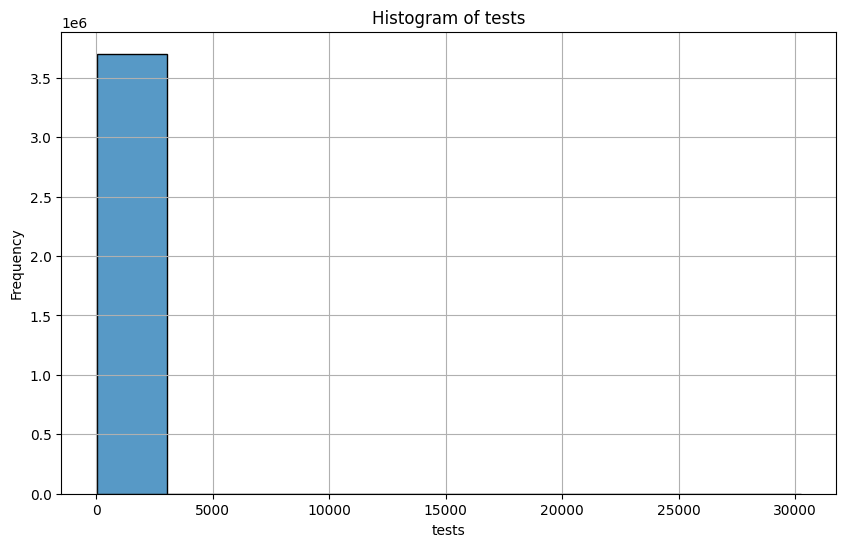

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(gdf['tests'], bins=10)
plt.title('Histogram of tests')
plt.xlabel('tests')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

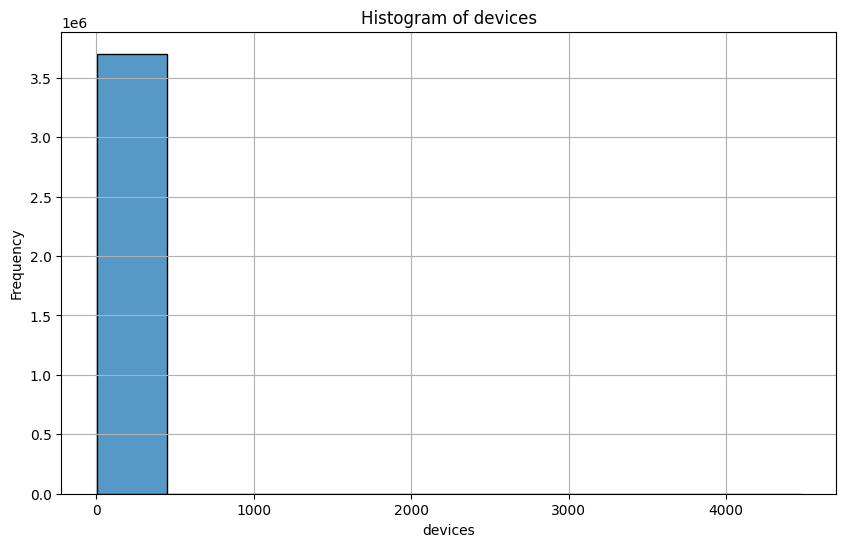

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(gdf['devices'], bins=10)
plt.title('Histogram of devices')
plt.xlabel('devices')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
for col in cols_with_int_values:
  gdf[col] = stats.mstats.winsorize(gdf[col], limits=[0.01, 0.01])

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3703161 entries, 0 to 3703160
Data columns (total 7 columns):
 #   Column      Dtype   
---  ------      -----   
 0   quadkey     object  
 1   avg_d_kbps  int64   
 2   avg_u_kbps  int64   
 3   avg_lat_ms  int64   
 4   tests       int64   
 5   devices     int64   
 6   geometry    geometry
dtypes: geometry(1), int64(5), object(1)
memory usage: 197.8+ MB


In [ ]:
gdf.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
count,3.703161e+06,3.703161e+06,3.703161e+06,3.703161e+06,3.703161e+06
mean,1.062664e+05,1.681513e+04,3.788177e+01,5.037009e+00,2.493221e+00
std,1.433965e+05,1.770877e+04,2.933146e+01,9.306366e+00,3.517583e+00
min,4.460000e+02,7.500000e+01,1.200000e+01,1.000000e+00,1.000000e+00
25%,1.761500e+04,3.963000e+03,2.200000e+01,1.000000e+00,1.000000e+00
50%,4.811800e+04,1.127300e+04,3.000000e+01,2.000000e+00,1.000000e+00
75%,1.316330e+05,2.340700e+04,4.200000e+01,4.000000e+00,2.000000e+00
max,7.323110e+05,9.066000e+04,2.090000e+02,6.300000e+01,2.400000e+01


In [ ]:
gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,0022133222330013,10551,19524,161,1,1,"POLYGON ((-160.03235 70.63995, -160.02686 70.6..."
1,0022133222330102,52886,20394,104,1,1,"POLYGON ((-160.02686 70.63995, -160.02136 70.6..."
2,0022133222330210,31909,20621,202,1,1,"POLYGON ((-160.03784 70.63448, -160.03235 70.6..."
3,0022320121121323,10763,4299,209,1,1,"POLYGON ((-166.74500 68.35262, -166.73950 68.3..."
4,0022332203013331,128222,10598,41,3,2,"POLYGON ((-162.60315 66.89991, -162.59766 66.8..."


In [ ]:
gdf.plot()

In [ ]:
for col in cols_with_int_values:
  plt.figure(figsize=(10, 6))
  sns.histplot(gdf[col], bins=30)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Earth Enginer Data Catalog NEON RGB Camera Imagery

Tutorial: https://www.youtube.com/watch?v=lwtgzrHrXj8

geemap: https://github.com/gee-community/geemap

Dataset: https://developers.google.com/earth-engine/datasets/catalog/projects_neon-prod-earthengine_assets_RGB_001

In [ ]:
import ee
import geemap

In [ ]:
# https://developers.google.com/earth-engine/guides/auth
ee.Authenticate()
ee.Initialize(project='my-project')

EEException: Caller does not have required permission to use project my-project. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=my-project and then retry. Propagation of the new permission may take a few minutes.

In [ ]:
Map = geemap.Map()
Map

EEException: ee.Initialize: no project found. Call with project= or see http://goo.gle/ee-auth.

In [ ]:
dataset = ee.FeatureCollection('projects/neon-prod-earthengine/assets/RGB/001')
Map.addLayer(dataset, {}, 'projects/neon-prod-earthengine/assets/RGB/001')

EEException: Google Earth Engine API has not been used in project 522309567947 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/earthengine.googleapis.com/overview?project=522309567947 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

# Pre Maker-Day 1 EDA

Focus on slides 4 and 6: https://docs.google.com/presentation/d/1ifY45c9n-Aq0UzB6bWzQz70IPWO5s4vpR6WkQXTjyOU/edit?usp=sharing

Global Land Survey (GLS): https://cmr.earthdata.nasa.gov/search/concepts/C1220567576-USGS_LTA.html

Tried Landsat C2 U.S. Analysis Ready Data (ARD) here but cannot figure out how to download or use this dataset: https://earthexplorer.usgs.gov/

# FCC Data

Dataset download: https://broadbandmap.fcc.gov/data-download/data-by-provider

In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
# Read the shapefile (only specify the .shp file, the others will be read automatically)
gdf = gpd.read_file("bdc_01_131425_4GLTE_mobile_broadband_h3_J23_01sep2024.shp")

FeatureError: fread(334) failed on DBF file.

In [ ]:
gdf.shape

In [ ]:
gdf.info()

# Dataset Matching

Landsat data download: https://broadbandmap.fcc.gov/data-download/data-by-provider

In [1]:
!pip install rasterio
!pip install matplotlib
!pip install fiona
!pip install geopandas
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/c4/51/701300256b943254a15f103154226e0f16c0d076286dcb83fb75160f5743/rasterio-1.4.1-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for cligj>=0.5 from https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for click-plugins from https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e472702488857914bdd50f73021efea15b4cad9aca8ecef/click_plugins-1.1.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 29.4 MB/s eta 0:00:0000:0100:01

[not

In [2]:
import rasterio
from rasterio.mask import mask
from rasterio.transform import rowcol
import geopandas as gpd
from shapely.geometry import box
import fiona
import pandas as pd
import matplotlib.pyplot as plt

type(src)=<class 'rasterio.io.DatasetReader'>
src.profile={'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, -110.0,
       0.0, -0.00025, 40.0), 'blockxsize': 40000, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


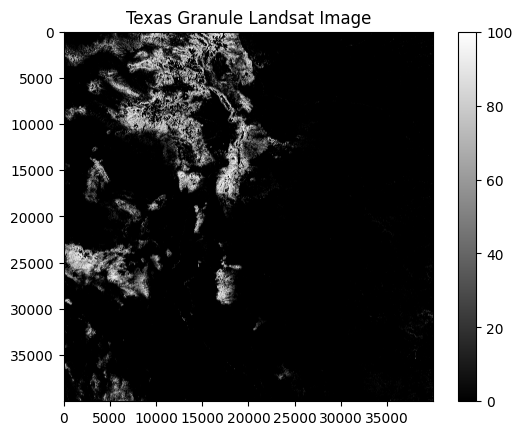

In [5]:
# Landsat data: https://storage.googleapis.com/earthenginepartners-hansen/GFC-2023-v1.11/download.html
# Granule with top-left corner at 40N, 110W
tif_path = 'Hansen_GFC-2023-v1.11_treecover2000_40N_110W.tif'
with rasterio.open(tif_path) as src:
    print(f'{type(src)=}')
    print(f'{src.profile=}')
    tile = src.read(1)

plt.imshow(tile, cmap='gray')
plt.colorbar()
plt.title("Texas Granule Landsat Image")
plt.show()

FCC data download: https://broadbandmap.fcc.gov/data-download/data-by-provider

In [ ]:
gdf = gpd.read_file('4GLTE_mobile_broadband_sep2024.gpkg')
print(gdf.crs)

In [ ]:
gdf = gdf.to_crs(epsg=4326)